<a href="https://colab.research.google.com/github/Bitirna/reimagined-doodle/blob/main/WC_AT_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1 IMPORT DATA

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/WC_AT.csv")

In [ ]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


STEP 2 EDA: DATA CLEANING IF REQUIRED

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


DETERMINE CORRELATION COEFFICIENT

In [ ]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


HISTOGRAM SHOWING DISTRIBUTION OF DATA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


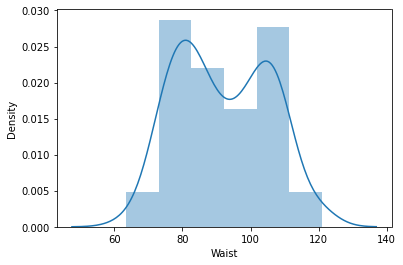

In [ ]:
import seaborn as sns
sns.distplot(data['Waist'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


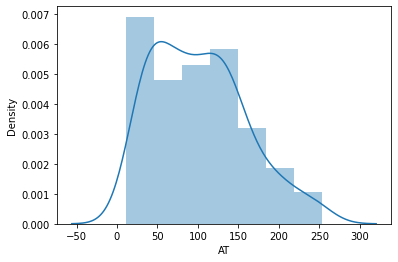

In [ ]:

sns.distplot(data['AT'])

STEP 3 BUILD ALGORITHM (REGRESSION EQUATION)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

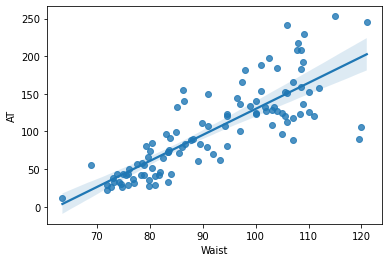

In [ ]:
sns.regplot(x="Waist", y="AT", data=data);

STEP 4 BUILD MODEL PARAMETERS

In [21]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept    47.025363
AT           14.740376
dtype: float64 
 Intercept    2.697170e-73
AT           1.618607e-27
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

STEP 5 PREDICTION FOR NEW DATA POINT

In [23]:
newdata=pd.Series([65,150,40])

In [24]:
newdata

0     65
1    150
2     40
dtype: int64

In [25]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [26]:
data_pred

,Waist
0,65
1,150
2,40


In [27]:
model.predict(data_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64

In [28]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000
